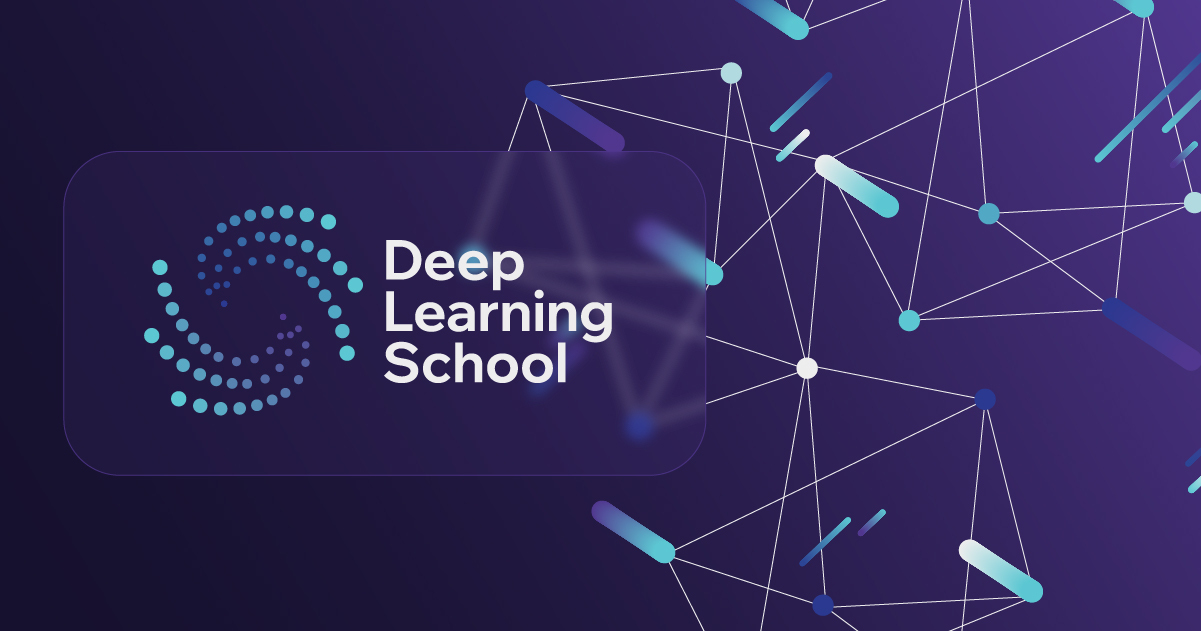

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

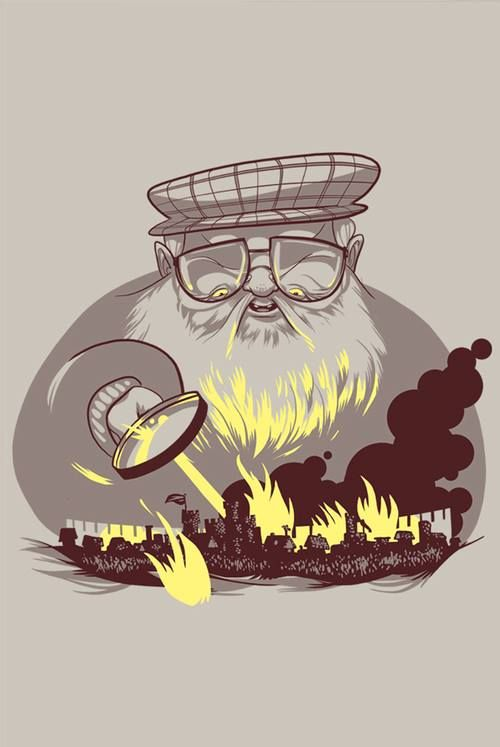

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [207]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 50.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 63.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [209]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")

In [210]:
test = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [211]:
data.shape

(1557, 25)

In [212]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [213]:
data.drop(columns=["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "heir", "mother", "father", "spouse", "dateOfBirth"], inplace=True)

In [214]:
test.drop(columns=["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "heir", "mother", "father", "spouse", "dateOfBirth"], inplace=True)

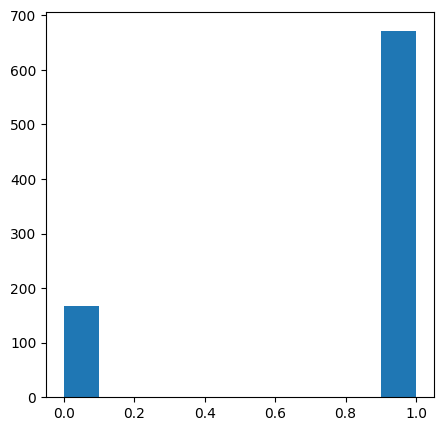

In [215]:
tmp = data[['title', 'isAlive']]
nan_rows_df = tmp[tmp.isna().any(axis=1)]
plt.figure(figsize=(5,5))
plt.hist(nan_rows_df['isAlive'])
plt.show()
del tmp

In [216]:
data['TitlePriority'] = 0
data['TitlePriority'][(data['title'].isna())] = 1

/tmp/ipython-input-216-1250083744.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['TitlePriority'][(data['title'].isna())] = 1
/tmp/ipython-input-216-1250083744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [217]:
test['TitlePriority'] = 0
test['TitlePriority'][(test['title'].isna())] = 1

/tmp/ipython-input-217-3630081689.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['TitlePriority'][(test['title'].isna())] = 1
/tmp/ipython-input-217-3630081689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of

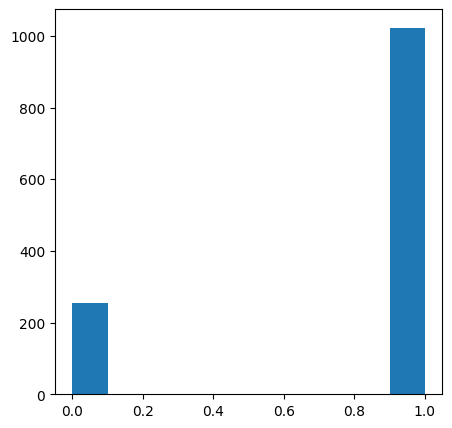

In [218]:
tmp = data[['age', 'isAlive']]
nan_rows_df = tmp[tmp.isna().any(axis=1)]
plt.figure(figsize=(5,5))
plt.hist(nan_rows_df['isAlive'])
plt.show()
del tmp

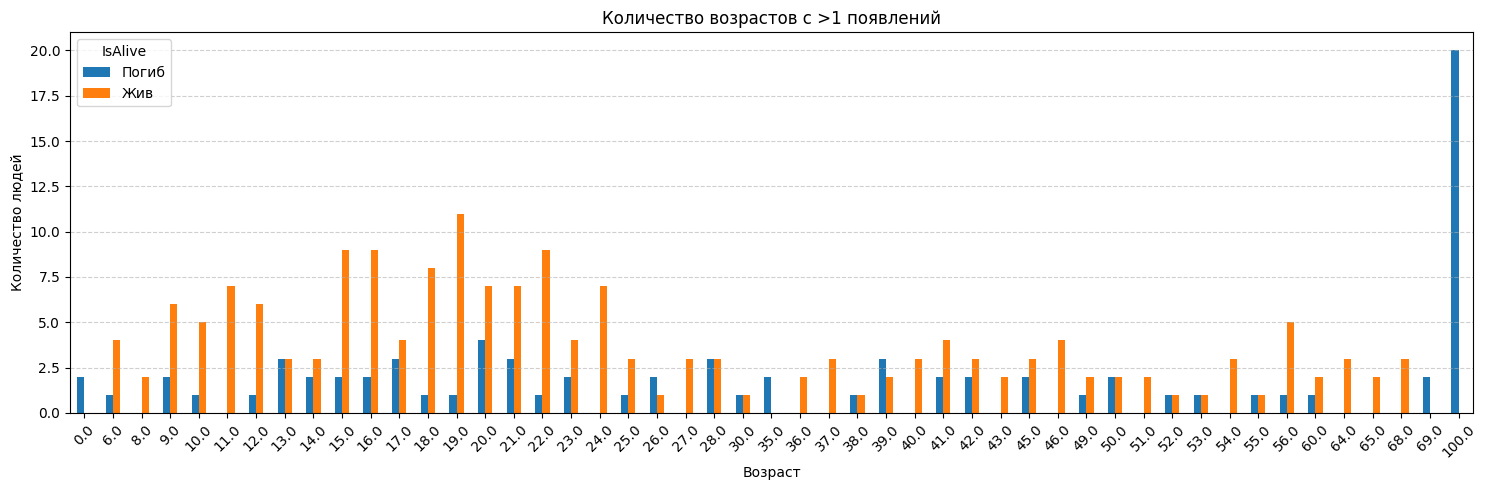

In [219]:
tmp = data[['age', 'isAlive']]

title_counts = tmp['age'].value_counts()

N = 1
valid_titles = title_counts[title_counts > N].index

filtered_df = tmp[tmp['age'].isin(valid_titles)]

counts = filtered_df.groupby(['age', 'isAlive']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(15,5))

plt.title(f'Количество возрастов с >{N} появлений')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.legend(title='IsAlive', labels=['Погиб', 'Жив'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

del tmp

In [220]:
data['age'] = data['age'].fillna(data['age'].dropna()[data['age'] < 69].mean())

In [221]:
test['age'] = test['age'].fillna(test['age'].dropna()[test['age'] < 69].mean())

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [222]:
data['isPopular'] = 0
data['isPopular'][(data['popularity'] >= 0.5)] = 1
data.drop(columns=['popularity'], inplace=True)

/tmp/ipython-input-222-3386682819.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['isPopular'][(data['popularity'] >= 0.5)] = 1
/tmp/ipython-input-222-3386682819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [223]:
test['isPopular'] = 0
test['isPopular'][(test['popularity'] >= 0.5)] = 1
test.drop(columns=['popularity'], inplace=True)

/tmp/ipython-input-223-1471122519.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['isPopular'][(test['popularity'] >= 0.5)] = 1
/tmp/ipython-input-223-1471122519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [224]:
data['boolDeadRelations'] = 0
data['boolDeadRelations'][(data['numDeadRelations']) > 0] = 1
data.drop(columns=['numDeadRelations'], inplace=True)

/tmp/ipython-input-224-3527583916.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['boolDeadRelations'][(data['numDeadRelations']) > 0] = 1
/tmp/ipython-input-224-3527583916.py:2: SettingWithCopyWarning: 
A value is trying to be set 

In [225]:
test['boolDeadRelations'] = 0
test['boolDeadRelations'][(test['numDeadRelations']) > 0] = 1
test.drop(columns=['numDeadRelations'], inplace=True)

/tmp/ipython-input-225-1622325201.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['boolDeadRelations'][(test['numDeadRelations']) > 0] = 1
/tmp/ipython-input-225-1622325201.py:2: SettingWithCopyWarning: 
A value is trying to be set 

In [226]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

data['culture'] = data['culture'].str.lower()
data['culture'] = data['culture'].fillna(data['culture'].dropna().mode().iloc[0])

def fill_culture():
  for culture in data['culture']:
    if culture[0].isupper():
      continue
    for key, values in cult.items():
      for v in values:
        if v == culture:
          data['culture'] = data['culture'].replace(culture, key)

fill_culture()

In [227]:
test['culture'] = test['culture'].str.lower()
test['culture'] = test['culture'].fillna(test['culture'].dropna().mode().iloc[0])

def fill_culture():
  for culture in test['culture']:
    if culture[0].isupper():
      continue
    for key, values in cult.items():
      for v in values:
        if v == culture:
          test['culture'] = test['culture'].replace(culture, key)

fill_culture()

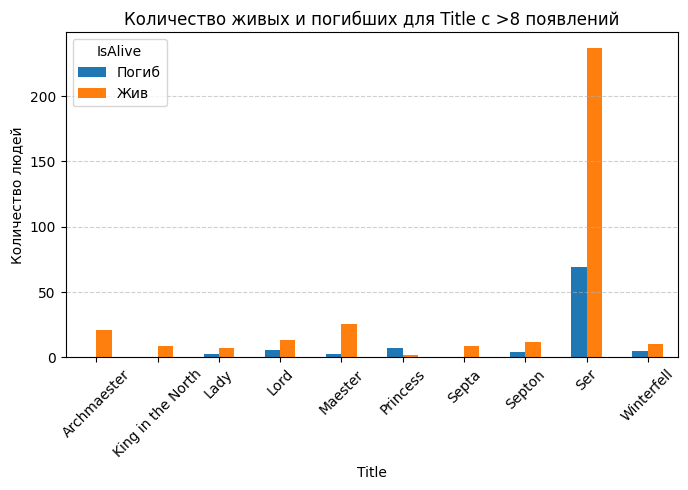

In [228]:
tmp = data[['title', 'isAlive']]

title_counts = tmp['title'].value_counts()

N = 8
valid_titles = title_counts[title_counts > N].index

filtered_df = tmp[tmp['title'].isin(valid_titles)]

counts = filtered_df.groupby(['title', 'isAlive']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(7,5))

plt.title(f'Количество живых и погибших для Title с >{N} появлений')
plt.xlabel('Title')
plt.ylabel('Количество людей')
plt.legend(title='IsAlive', labels=['Погиб', 'Жив'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

del tmp

In [229]:
data['TitlePriority'][(data['title'] == 'Ser') | (data['title'] == 'Archmaester') | (data['title'] == 'Maester' ) | (data['title'].isna())] = 1
data.drop(columns=['title'], inplace=True)

/tmp/ipython-input-229-243190022.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['TitlePriority'][(data['title'] == 'Ser') | (data['title'] == 'Archmaester') | (data['title'] == 'Maester' ) | (data['title'].isna())] = 1
/tmp/ipython

In [230]:
test['TitlePriority'][(test['title'] == 'Ser') | (test['title'] == 'Archmaester') | (test['title'] == 'Maester' ) | (test['title'].isna())] = 1
test.drop(columns=['title'], inplace=True)

/tmp/ipython-input-230-3383847379.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['TitlePriority'][(test['title'] == 'Ser') | (test['title'] == 'Archmaester') | (test['title'] == 'Maester' ) | (test['title'].isna())] = 1
/tmp/ipytho

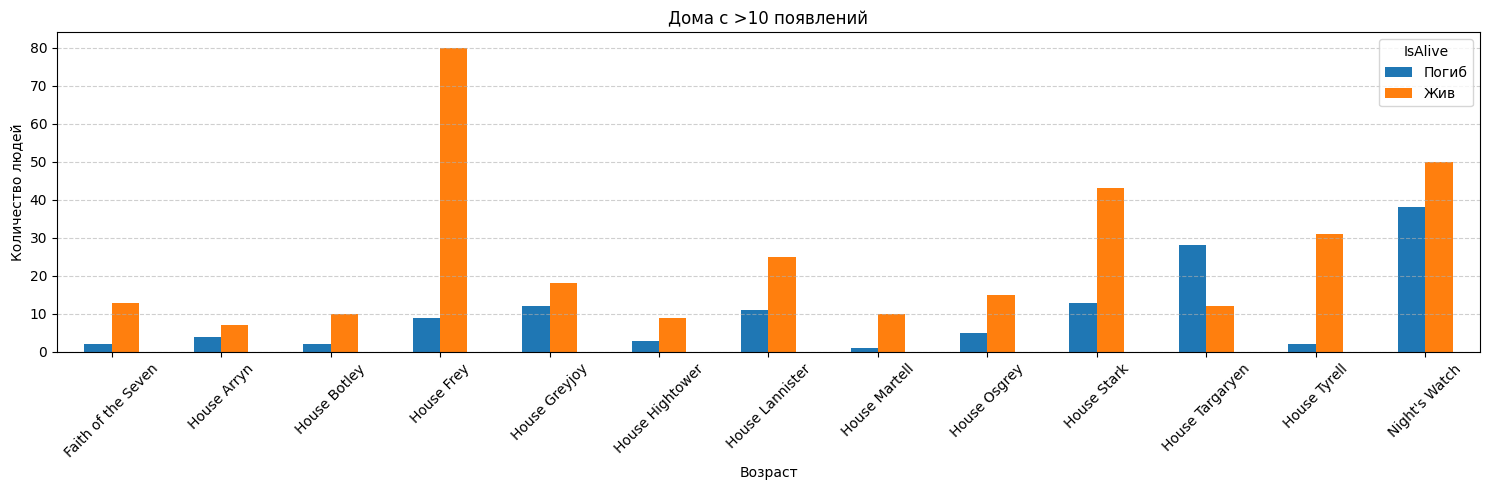

In [231]:
tmp = data[['house', 'isAlive']]

title_counts = tmp['house'].value_counts()

N = 10
valid_titles = title_counts[title_counts > N].index

filtered_df = tmp[tmp['house'].isin(valid_titles)]

counts = filtered_df.groupby(['house', 'isAlive']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(15,5))

plt.title(f'Дома с >{N} появлений')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.legend(title='IsAlive', labels=['Погиб', 'Жив'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

del tmp

In [232]:
data.drop(columns='house', inplace=True)

In [233]:
test.drop(columns='house', inplace=True)

In [234]:
data.isna().sum()

,0
name,0
male,0
culture,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [235]:
data.drop(columns='name', inplace=True)

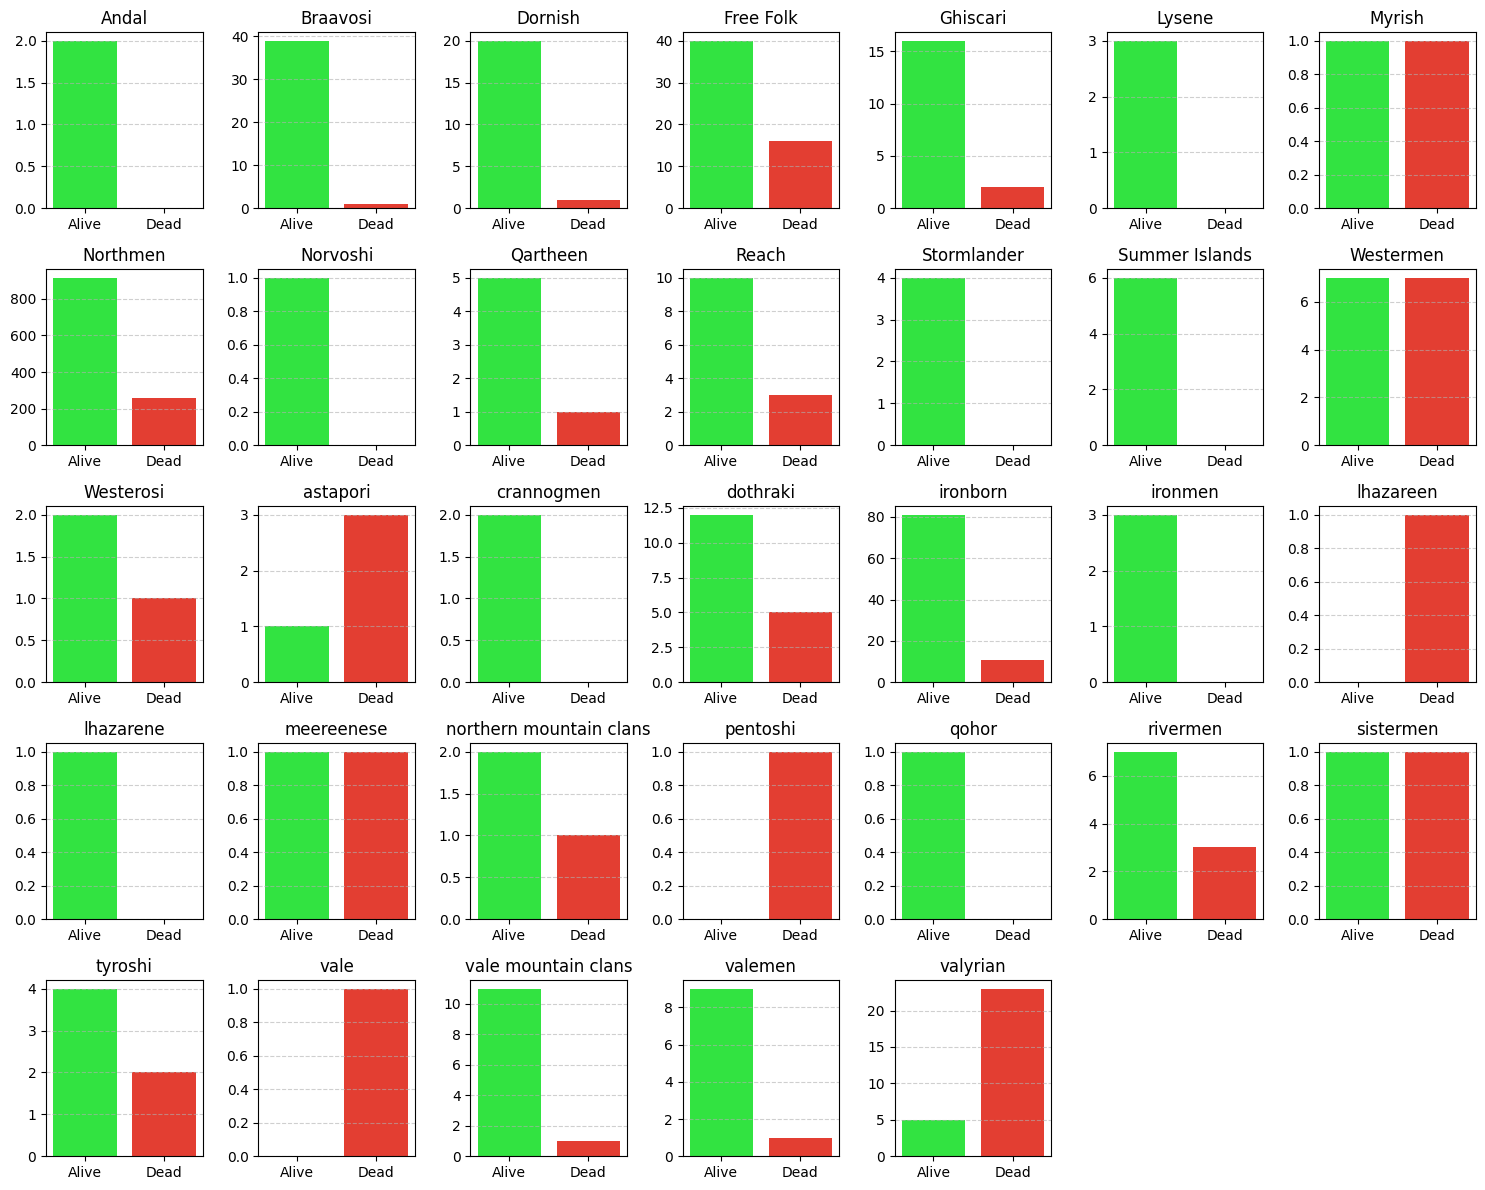

In [236]:
tmp1 = data['culture'].value_counts().reset_index().sort_values(by='culture').reset_index()
tmp2 = data.groupby('culture')['isAlive'].sum().reset_index()
tmp = pd.DataFrame(
    {'culture': tmp1['culture'],
     'isAlive': tmp2['isAlive'],
     'isDead': tmp1['count'] - tmp2['isAlive']}
)
del tmp1, tmp2

grouped_data = tmp.groupby('culture')[['isAlive', 'isDead']].sum().reset_index()
plt.figure(figsize=(15, 12))
for i, (_, row) in enumerate(grouped_data.iterrows(), 1):
    plt.subplot(5, 7, i)
    plt.bar(['Alive', 'Dead'], [row['isAlive'], row['isDead']], color=['#32e341', '#e33e32'])
    plt.title(f'{row["culture"]}')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
del tmp, grouped_data

In [237]:
save_cultures = ['Braavosi', 'Dornish', 'Northmen', 'Ghiscari', 'valyrian', 'other']
series = dict()
for c in save_cultures:
  series[c] = pd.Series(np.zeros(data.shape[0] + 1))
df_cultures = pd.DataFrame(series)
data = pd.concat([data, df_cultures], axis=1)
del df_cultures, series
data.drop(0, inplace=True)
for name in save_cultures:
  data.loc[data['culture'] == name, name] = 1

data.loc[~data['culture'].isin(save_cultures), 'culture'] = 'other'
data.loc[data['culture'] == 'other', 'other'] = 1

data.drop(columns=['culture'], inplace=True)
data.sample(5)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,TitlePriority,isPopular,boolDeadRelations,Braavosi,Dornish,Northmen,Ghiscari,valyrian,other
700,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,27.453061,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
716,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.453061,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1494,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,27.453061,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
752,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,25.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
791,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [238]:
save_cultures = ['Braavosi', 'Dornish', 'Northmen', 'Ghiscari', 'valyrian', 'other']
series = dict()
for c in save_cultures:
  series[c] = pd.Series(np.zeros(test.shape[0] + 1))
df_cultures = pd.DataFrame(series)
test = pd.concat([test, df_cultures], axis=1)
del df_cultures, series
test.drop(0, inplace=True)
for name in save_cultures:
  test.loc[test['culture'] == name, name] = 1

test.loc[~test['culture'].isin(save_cultures), 'culture'] = 'other'
test.loc[test['culture'] == 'other', 'other'] = 1

test.drop(columns=['culture'], inplace=True)

In [279]:
test = test.iloc[:-389].fillna(0)

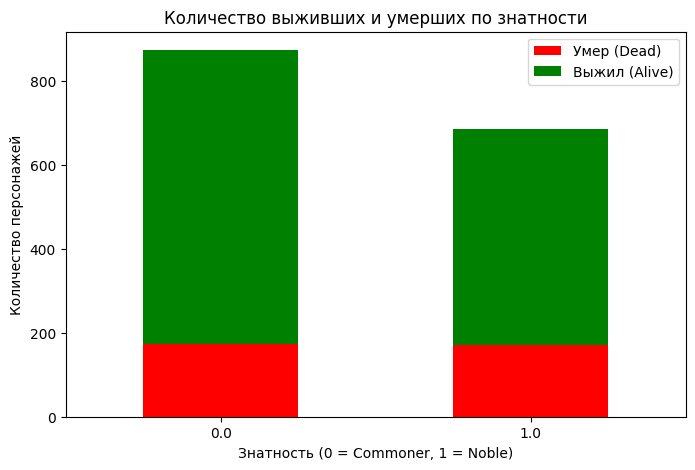

In [239]:
tmp = data[['isNoble', 'isAlive']]

# Группируем и суммируем
counts = tmp.groupby('isNoble')['isAlive'].value_counts().unstack()

# Рисуем столбцы
counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.title('Количество выживших и умерших по знатности')
plt.xlabel('Знатность (0 = Commoner, 1 = Noble)')
plt.ylabel('Количество персонажей')
plt.legend(['Умер (Dead)', 'Выжил (Alive)'])
plt.xticks(rotation=0)
plt.show()

In [240]:
data.drop(columns=['isNoble'], inplace = True)

In [241]:
test.drop(columns=['isNoble'], inplace = True)

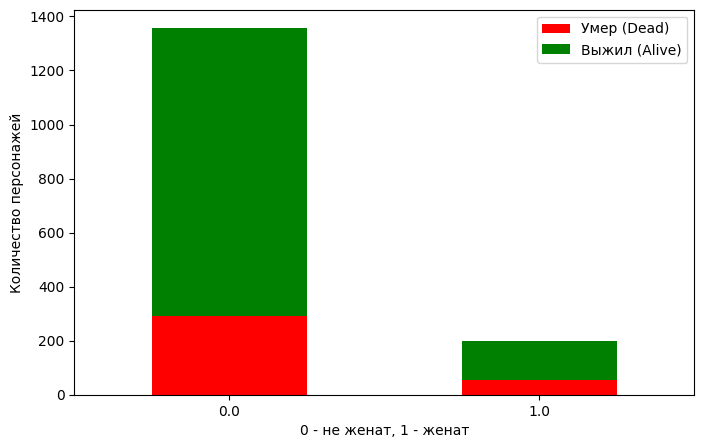

In [242]:
tmp = data[['isMarried', 'isAlive']]

# Группируем и суммируем
counts = tmp.groupby('isMarried')['isAlive'].value_counts().unstack()

# Рисуем столбцы
counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.xlabel('0 - не женат, 1 - женат')
plt.ylabel('Количество персонажей')
plt.legend(['Умер (Dead)', 'Выжил (Alive)'])
plt.xticks(rotation=0)
plt.show()

In [243]:
data.drop(columns=['isMarried'], inplace = True)

In [244]:
test.drop(columns=['isMarried'], inplace = True)

In [245]:
data

,male,book1,book2,book3,book4,book5,age,isAlive,TitlePriority,isPopular,boolDeadRelations,Braavosi,Dornish,Northmen,Ghiscari,valyrian,other
1,1.0,0.0,0.0,0.0,0.0,0.0,27.453061,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,97.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,27.453061,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,29.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1.0,1.0,0.0,1.0,1.0,0.0,27.453061,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1554,0.0,1.0,1.0,0.0,0.0,0.0,27.453061,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1555,1.0,0.0,1.0,1.0,1.0,1.0,27.453061,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1556,0.0,0.0,1.0,1.0,1.0,1.0,22.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [246]:
data['isAlive'].head(3)

,isAlive
1,0.0
2,1.0
3,1.0


In [247]:
data['isAlive'].value_counts()

,count
isAlive,
1.0,1212
0.0,345


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

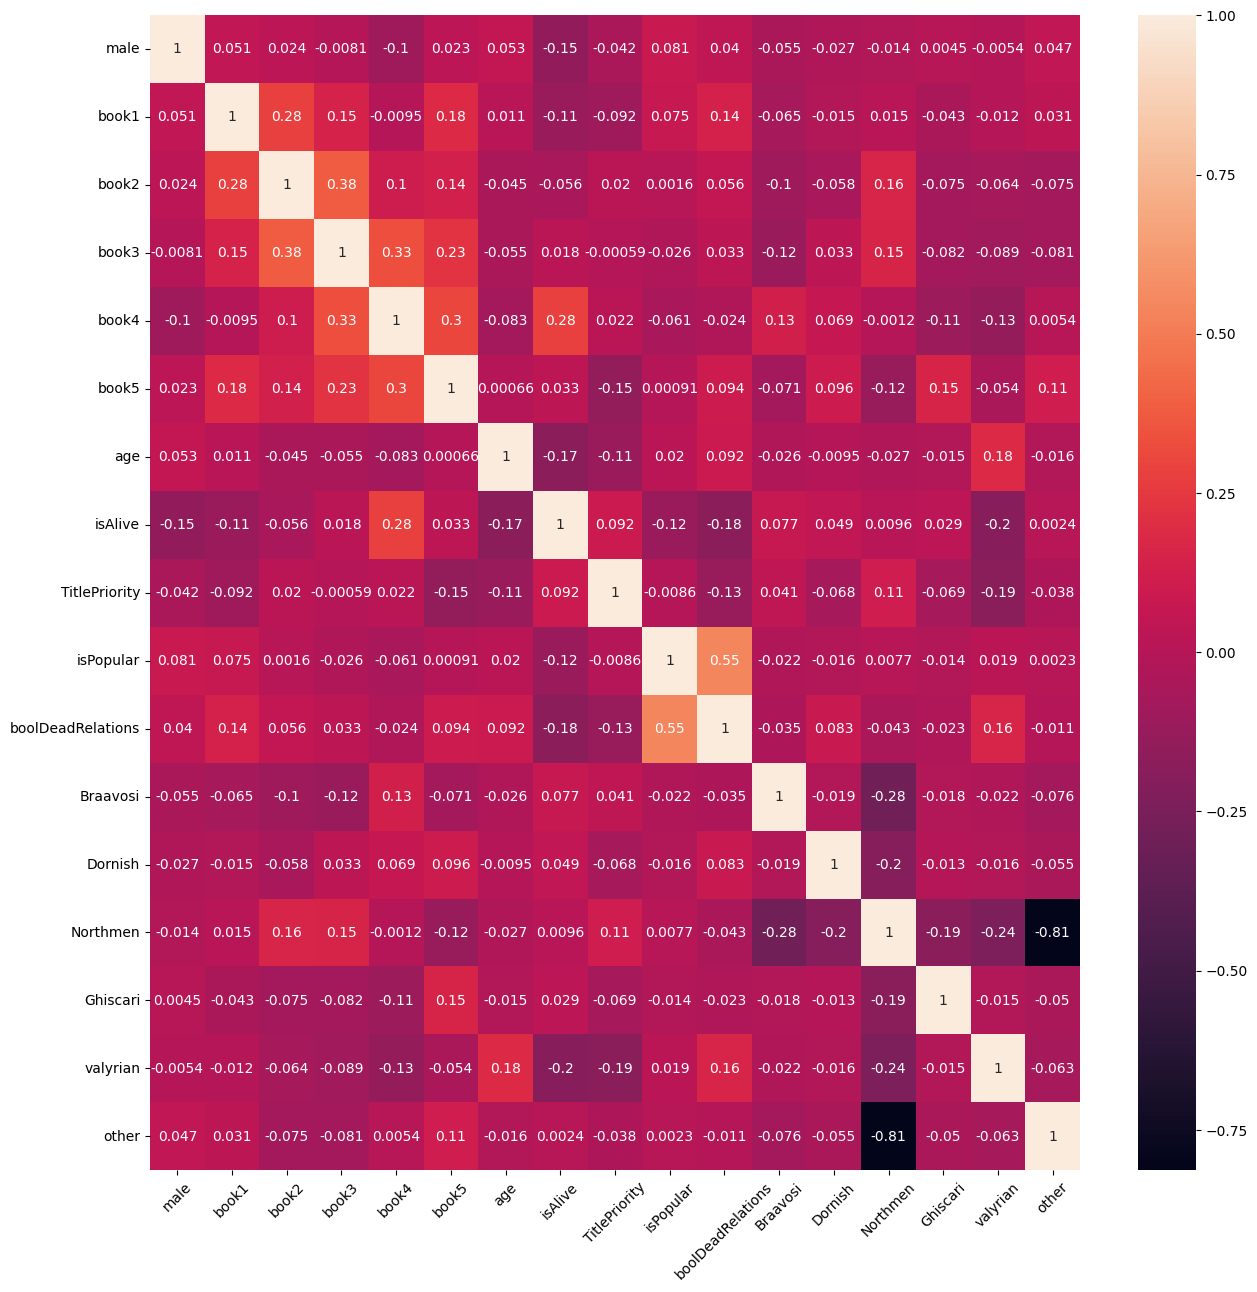

In [248]:
corrmat = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, annot=True)
plt.xticks(rotation=45)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [249]:
# я это уже делал

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [250]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [253]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.transform(X_test[['age']])

X_train

,male,book1,book2,book3,book4,book5,age,TitlePriority,isPopular,boolDeadRelations,Braavosi,Dornish,Northmen,Ghiscari,valyrian,other
612,0.0,0.0,0.0,0.0,1.0,0.0,0.274531,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
313,0.0,1.0,0.0,0.0,0.0,0.0,0.274531,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
927,0.0,0.0,1.0,1.0,1.0,0.0,0.274531,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
995,1.0,1.0,0.0,0.0,1.0,1.0,0.180000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
586,0.0,0.0,1.0,0.0,0.0,0.0,0.274531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.0,0.0,0.0,0.0,1.0,1.0,0.274531,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1295,1.0,0.0,0.0,0.0,1.0,0.0,0.274531,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
861,1.0,0.0,1.0,0.0,0.0,0.0,0.274531,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1460,1.0,1.0,1.0,1.0,1.0,1.0,0.600000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [254]:
# test['age'] = scaler.transform(test['age'])
# test.drop(columns='isAlive', inplace=True)

In [255]:
test.drop(columns='name', inplace=True)

In [256]:
test['age'] = scaler.transform(test[['age']])

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [257]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [258]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [259]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, max_iter=1000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [260]:
ada_boost_clf = AdaBoostClassifier()
ada_boost_clf.fit(X_train, y_train)
y_pred_abc = ada_boost_clf.predict(X_test)

In [261]:
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)
y_pred_rfc = random_forest_clf.predict(X_test)

In [262]:
gaussian_clf = GaussianProcessClassifier()
gaussian_clf.fit(X_train, y_train)
y_pred_gpc = gaussian_clf.predict(X_test)

In [263]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [264]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [265]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [266]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [49]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [267]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7821


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [268]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_abc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7885


In [269]:
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7756


In [270]:
accuracy = accuracy_score(y_test, y_pred_gpc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7735


In [271]:
accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7714


In [272]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7692


In [273]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7821


In [274]:
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7714


Выберите лучшую модель.

In [60]:
# Лучшей моделью для решения данной задачи оказалась AdaBoostClassifier

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [74]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.7MB/s]


In [95]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [275]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [280]:
y_submission = ada_boost_clf.predict(test)

In [281]:
test

,male,book1,book2,book3,book4,book5,age,TitlePriority,isPopular,boolDeadRelations,Braavosi,Dornish,Northmen,Ghiscari,valyrian,other
1558,0.0,0.0,0.0,0.0,0.0,1.0,1.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1559,0.0,0.0,1.0,1.0,1.0,1.0,-42.99203,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1560,0.0,0.0,0.0,1.0,1.0,0.0,-42.99203,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1561,1.0,1.0,1.0,1.0,1.0,1.0,-42.99203,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1562,1.0,1.0,1.0,1.0,1.0,1.0,0.38000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1.0,1.0,1.0,1.0,1.0,1.0,-42.99203,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1943,1.0,0.0,1.0,0.0,1.0,1.0,-42.99203,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1944,1.0,1.0,1.0,1.0,1.0,1.0,-42.99203,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1945,1.0,0.0,0.0,1.0,1.0,1.0,-42.99203,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [282]:
submission['isAlive'] = y_submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [283]:
submission.to_csv("/content/new_submission.csv", index=False)

In [284]:
submission

,isAlive
S.No,
1558,0.0
1559,1.0
1560,1.0
1561,1.0
1562,1.0
...,...
1942,1.0
1943,1.0
1944,1.0
